# Reference Population: Neutral *vs* High Selection


The parameters are summarized in the table below:

Parameter  | Neutral | Selection  |
-----------|---------|------------|
Final size | $10^6$  |   $10^6$   |
q (start)  |$10^{-3}$| $10^{-3}$  |
q-factor   | $1$   |   $1$    |  
P(death)   | $0.3$   |   $0.3$    |
**Selection**  | 0   |  **1**   |  

In [1]:
from ThesisScripts.MyModel import *
from ThesisScripts.Analyses import *
from ThesisScripts.Visualizations import *
from ThesisScripts.PhyloTree import *

from IPython.display import Image

%matplotlib inline
#matplotlib preamble, taken from http://blog.juliusschulz.de/blog/ultimate-ipython-notebook
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('pdf', 'png')
plt.rcParams['savefig.dpi'] = 75

plt.rcParams['figure.autolayout'] = False
plt.rcParams['figure.figsize'] = 14, 7
plt.rcParams['axes.labelsize'] = 18
plt.rcParams['axes.titlesize'] = 20
plt.rcParams['font.size'] = 16
plt.rcParams['lines.linewidth'] = 2.0
plt.rcParams['lines.markersize'] = 8
plt.rcParams['legend.fontsize'] = 14

# Reference simulations

## Neutral

In [2]:
# set seed to get same result for each test simulation
np.random.seed(123)

# Test cell
l = 10**6
q = 10**(-3)
qfac = 1
alpha = 0.3
sel = 0
ref = Population(l, q, mutfactor=qfac, death_frac=alpha, selection=sel)
ref.simulate()
print("Total population size:", ref.size)
print("Generations:", ref.gen)
print()
print("Start clone size:", ref.start_clone.size)
print("Number of subclones:", len(ref.clones[1:]))

Total population size: 1668674
Generations: 27

Start clone size: 1655654
Number of subclones: 2375


## High selection

In [3]:
# set seed to get same result for each test simulation
np.random.seed(123)

# Test cell
l = 10**6
q = 10**(-3)
qfac = 1
alpha = 0.3
sel = 1
highSel = Population(l, q, mutfactor=qfac, death_frac=alpha, selection=sel)
highSel.simulate()
print("Total population size:", highSel.size)
print("Generations:", highSel.gen)
print()
print("Start clone size:", highSel.start_clone.size)
print("Number of subclones:", len(highSel.clones[1:]))

Total population size: 1668674
Generations: 27

Start clone size: 4869
Number of subclones: 2474


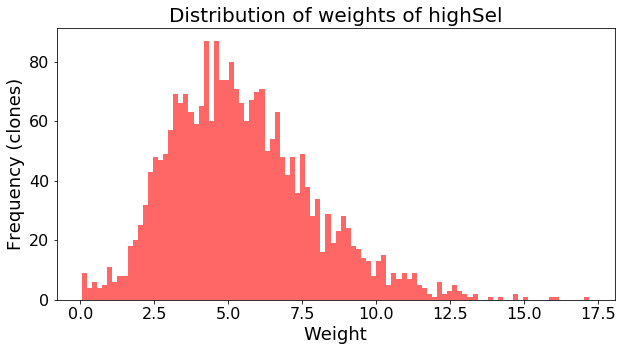

In [4]:
# Check weights of clones for population with selection
weights = []
for clone in highSel.clones:
    weights.append(clone.weight)

plt.figure(figsize=(10,5))
plt.hist(weights, bins=100, color='r', alpha=0.6)
plt.title("Distribution of weights of highSel")
plt.xlabel("Weight")
plt.ylabel("Frequency (clones)")
plt.show()

**ALL ANALYSES** are carried out with the detection limit defined below, unless otherwise stated.

In [5]:
detection_limit = 100

## Evolution of clone family sizes for Reference Population

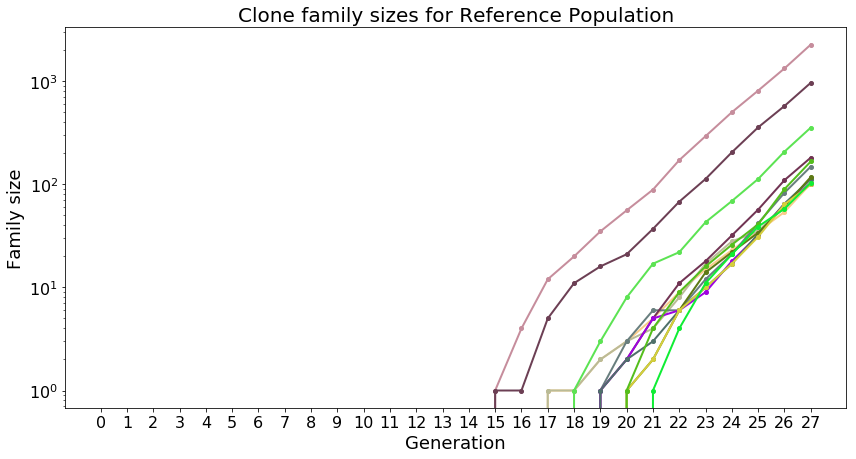

In [6]:
ref_fam_size_plot = family_size_plots(ref, det_lim=detection_limit)
plt.title("Clone family sizes for Reference Population")
#plt.legend()
#plt.savefig("./Figures/Ref-High_Selection/Ref-fam_size_evo.png")
plt.show()

## Evolution of clone family sizes for Reference Population with High Selection

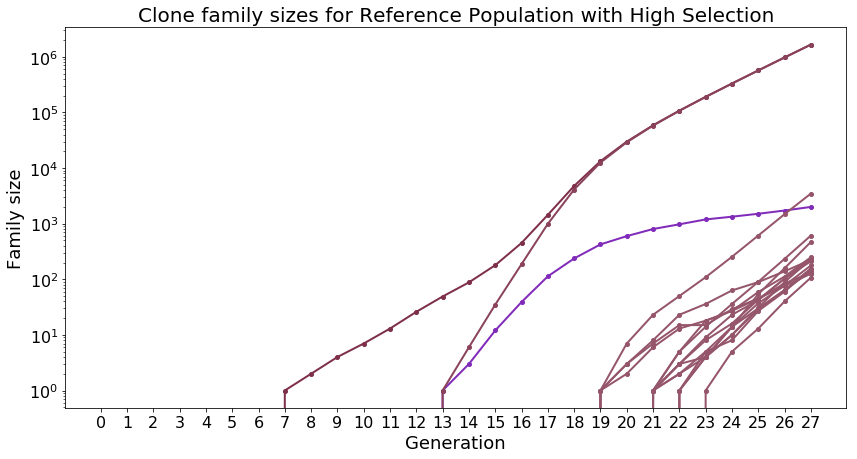

In [7]:
highSel_fam_size_plot = family_size_plots(highSel, det_lim=detection_limit)
plt.title("Clone family sizes for Reference Population with High Selection")
#plt.legend()
plt.savefig("./Figures/Ref-High_Selection/highSel-fam_size_evo.png")
plt.show()

## Evolution of Start clone size for High Selection

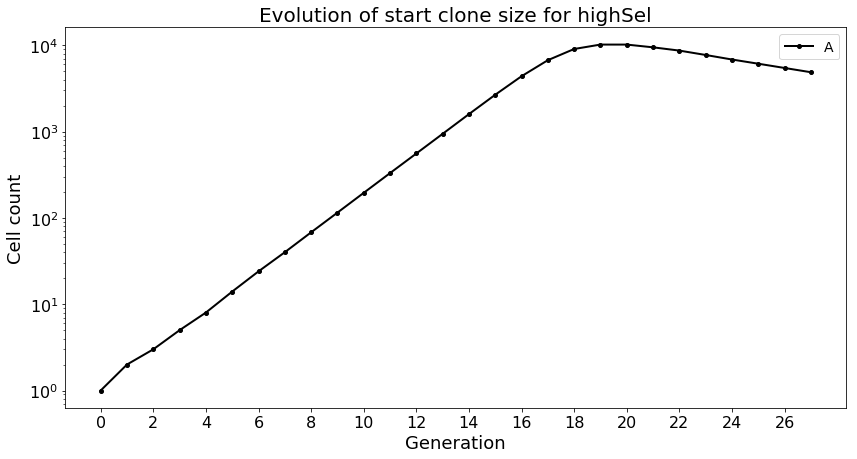

In [8]:
# evolution of start clone size for highSel
plt.figure()
plt.plot(highSel.start_clone.size_vec, marker='.', color='k', label=highSel.start_clone.ID);
plt.ylabel("Cell count");
plt.xlabel("Generation");
plt.title("Evolution of start clone size for highSel");
plt.legend();
plt.xticks(range(0, highSel.gen+1, 2));
plt.yscale('log');
plt.show()

## Phylo tree for Reference Population

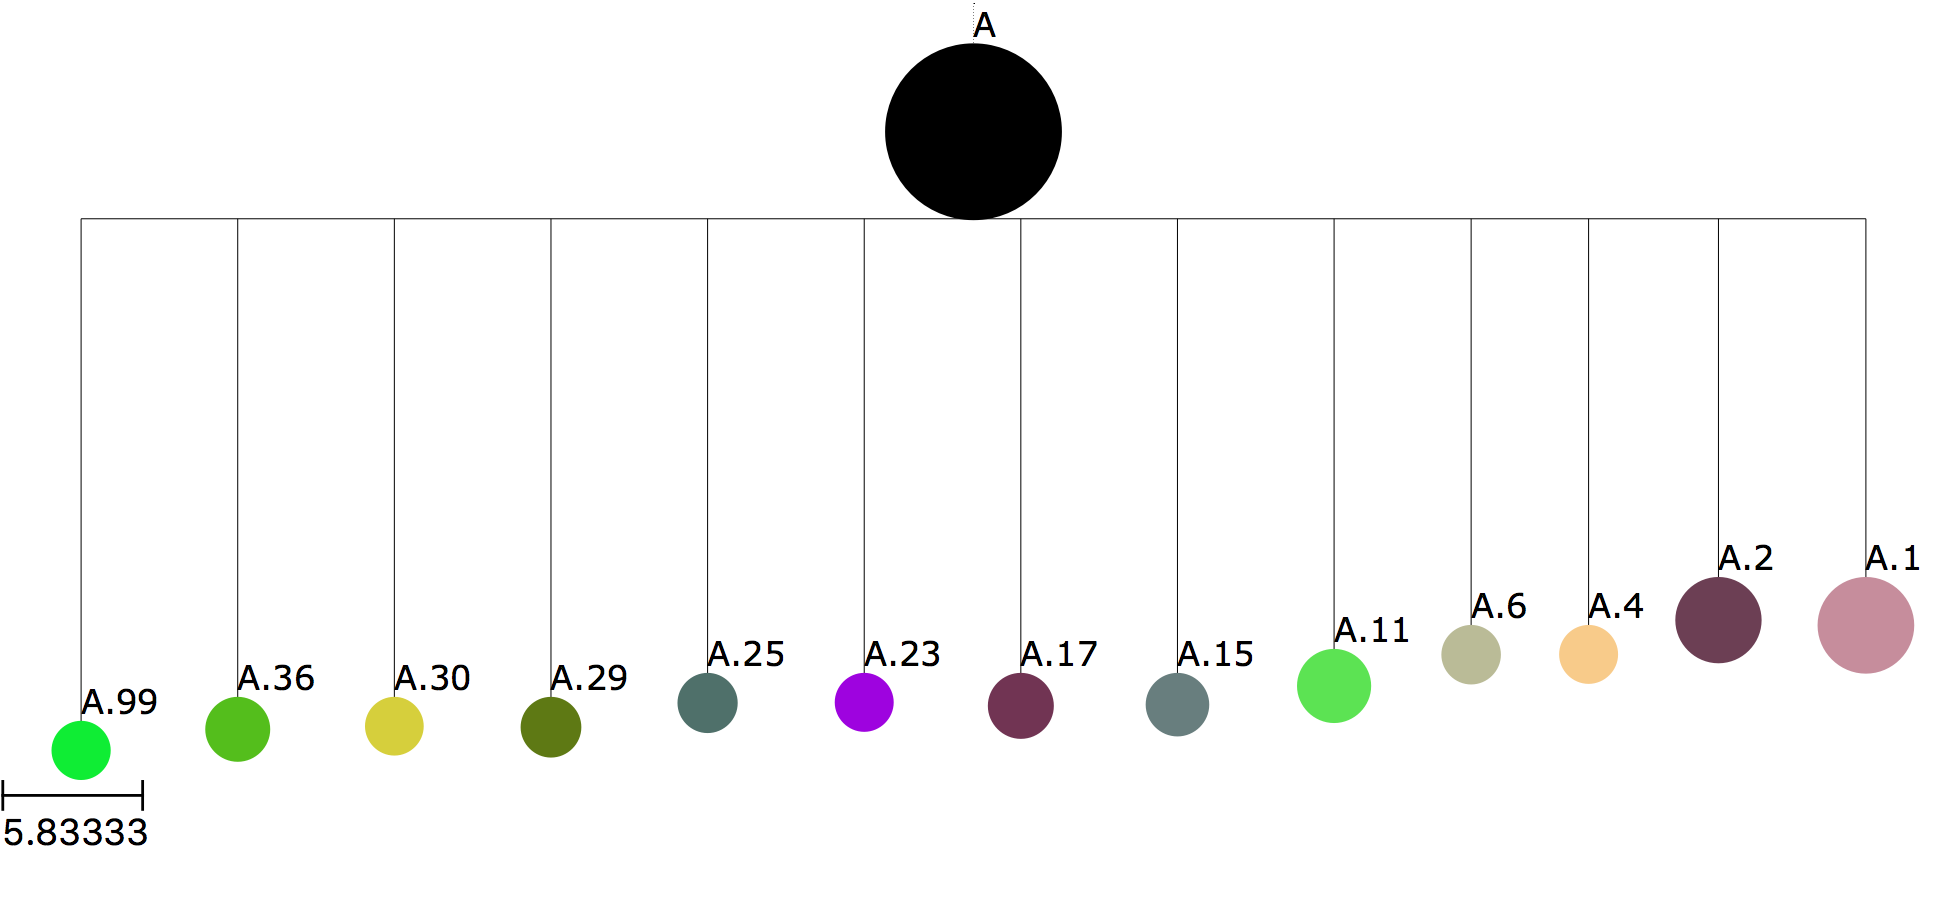

In [9]:
ref_tree, ref_ts = build_tree(ref, det_lim=detection_limit, log=True)
#print(ref_tree)
ref_tree.render("./Figures/Ref-High_Selection/Ref-tree.png", tree_style=ref_ts, h=260, units='mm');
Image("./Figures/Ref-High_Selection/Ref-tree.png")

## Phylo tree for Reference Population with High Selection

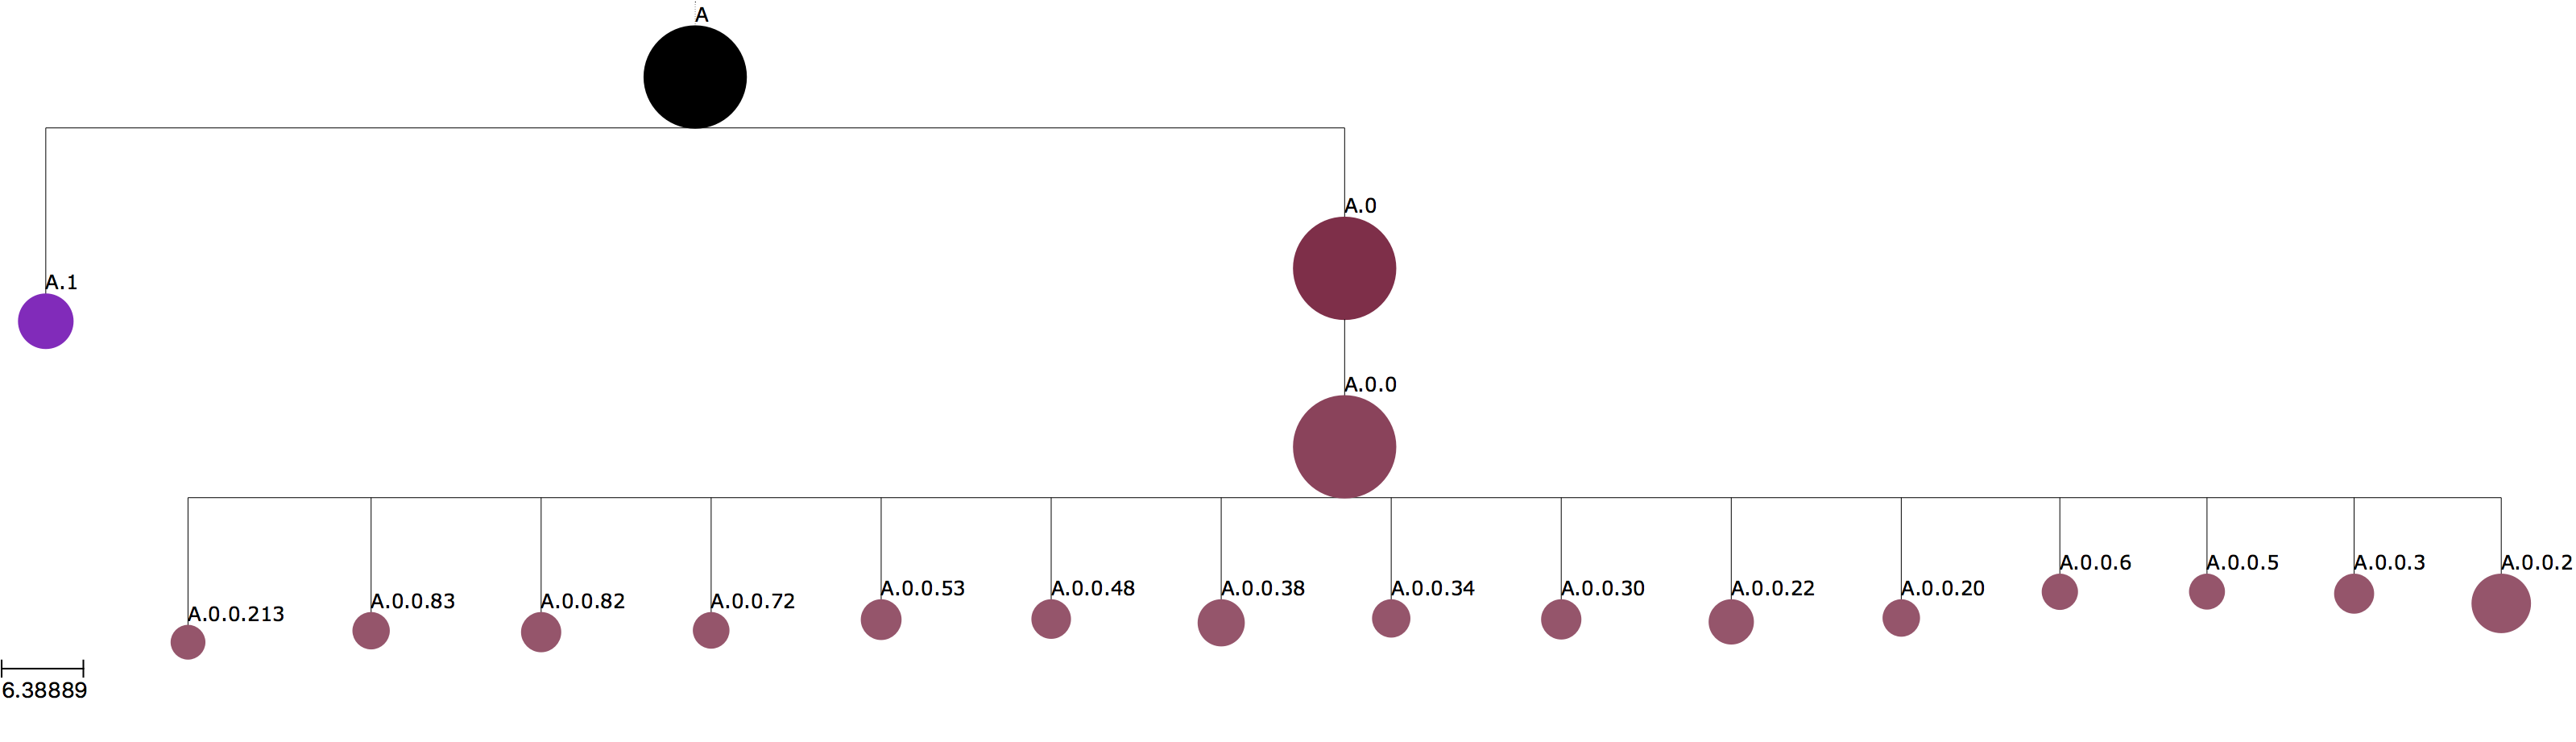

In [10]:
highSel_tree, highSel_ts = build_tree(highSel, det_lim=detection_limit, log=True)
#print(highSel_tree)
highSel_tree.render("./Figures/Ref-High_Selection/highSel-tree.png", tree_style=highSel_ts, h=260, units='mm');
Image("./Figures/Ref-High_Selection/highSel-tree.png")

## Allele frequency spectrum for Reference Population

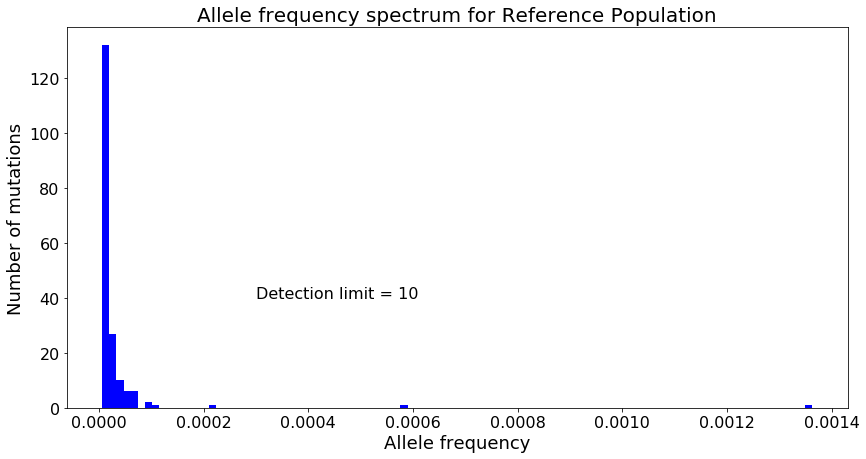

In [11]:
lim = 10
ref_af = allele_freq_spectrum(ref, det_lim=lim)
ref_af.iloc[1:].plot(kind='hist', grid=False, logy=False, bins=100, color='b');
plt.ylabel('Number of mutations');
plt.xlabel('Allele frequency');
plt.title('Allele frequency spectrum for Reference Population');
plt.text(0.0003, 40, "Detection limit = %s" %(lim));
#plt.savefig("./Figures/Ref-High_Selection/Ref-AF_spec.png")
plt.show()

## Allele frequency spectrum for Reference Population with Selection

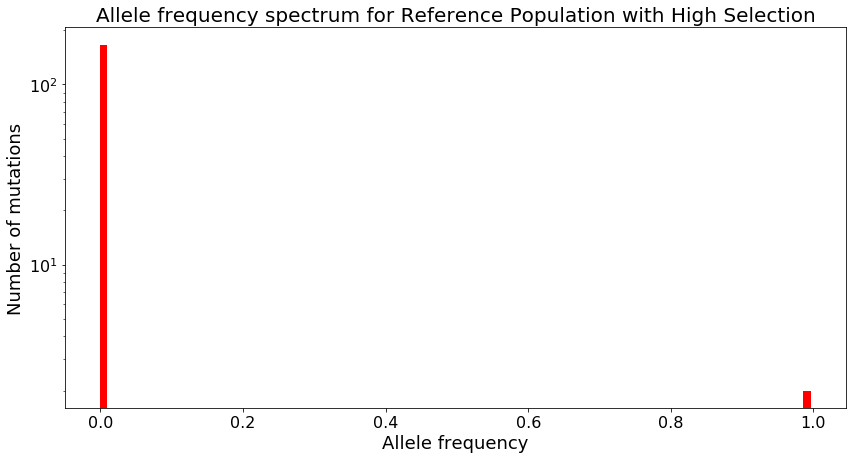

In [12]:
lim = 10
highSel_af = allele_freq_spectrum(highSel, det_lim=10)
highSel_af.iloc[1:].plot(kind='hist', grid=False, logy=True, bins=100, color='r');
plt.ylabel('Number of mutations');
plt.xlabel('Allele frequency');
plt.title('Allele frequency spectrum for Reference Population with High Selection');
#plt.text(0.7, 100, "Detection limit = %s" %(lim));
plt.savefig("./Figures/Ref-High_Selection/highSel-AF_spec.png")
plt.show()

## Cumulative number of mutations in function of 1/f 

## Distribution of number of mutations for Reference Population


R^2 = 0.997933509707


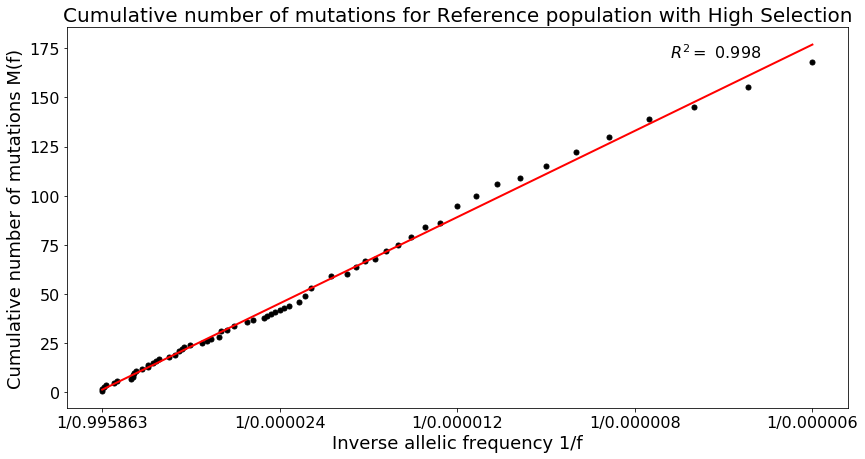

In [13]:
fit_highSel_af_raw, fit_highSel_af_r_value, fit_highSel_fig = fit_cumulative_mutations(highSel_af)
print("\nR^2 =", fit_highSel_af_r_value)
plt.title("Cumulative number of mutations for Reference population with High Selection");
plt.savefig("./Figures/Ref-High_Selection/highSel-Cum_num_M.png");
plt.show()

             Neutral evolution  Selection = 1
0 mutations          1655654.0           4869
1 mutation              4834.0           2471
2 mutations                NaN        1646906
3 mutations                NaN           6648


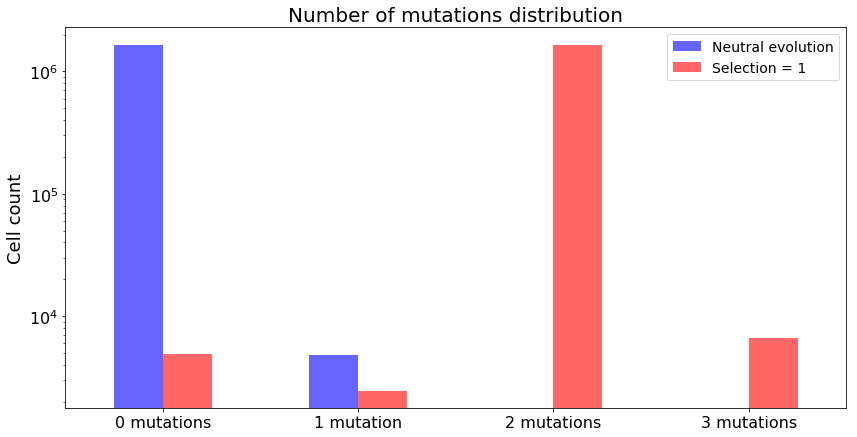

In [14]:
ref_num_mut_df = num_mutations_distribution(ref, det_lim=detection_limit)
ref_num_mut_df.columns = ["Neutral evolution"]
#ref_num_mut_df.plot(kind='bar', logy=True, legend=True, rot=0, color='b', alpha=0.6);

highSel_num_mut_df = num_mutations_distribution(highSel, det_lim=detection_limit)
highSel_num_mut_df.columns = ["Selection = %s" %(sel)]
#highSel_num_mut_df.plot(kind='bar', logy=True, legend=True, rot=0, color='r', alpha=0.6);

combo = ref_num_mut_df.join(highSel_num_mut_df, how='right')
print(combo)
combo.plot(kind='bar', logy=True, legend=True, rot=0, color=['b', 'r'], alpha=0.6);

plt.ylabel("Cell count");
plt.title("Number of mutations distribution");
#plt.savefig("./Figures/Ref-High_Selection/Neutral_vs_highSel-Num_mut.png")
plt.show()

## Reconstructing the mutational timeline for high Selection population

In [15]:
highSel_data = final_data(highSel)

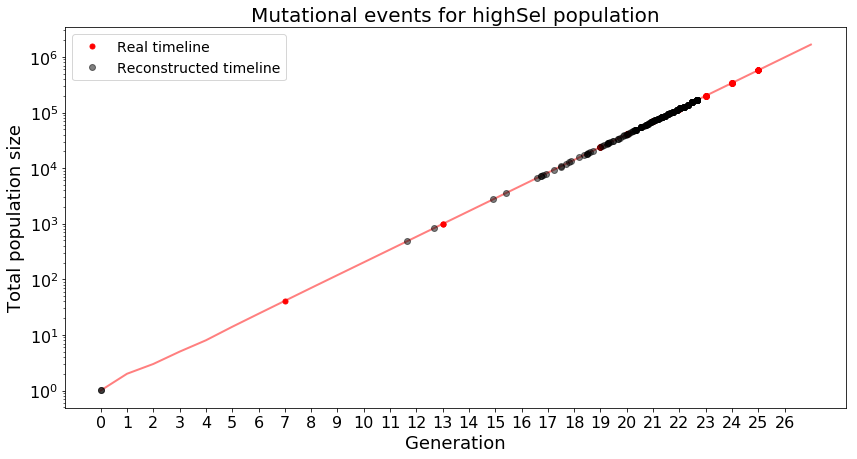

In [17]:
highSel_mutations = highSel_data.iloc[1:].loc[highSel_data['Family size'] >= 10]
highSel_real_t = highSel.gen - highSel_mutations['Age'].values
highSel_real_popsizes = list(highSel.size_vec[i] for i in highSel_real_t)

highSel_rec_t, highSel_rec_popsizes = reconstruct_mutational_timeline(highSel, det_lim = 10)

plt.plot(highSel.size_vec, color='r', alpha=0.5);
plt.plot(highSel_real_t, highSel_real_popsizes, marker='o', markersize=5, color='r', 
         linestyle='none', label='Real timeline');
plt.plot(highSel_rec_t, highSel_rec_popsizes, marker='o', markersize=6, color='k', alpha=0.5,
         linestyle='none', label='Reconstructed timeline');
plt.xlabel('Generation');
plt.ylabel('Total population size');
plt.legend();
plt.title('Mutational events for highSel population');
plt.xticks(range(0, highSel.gen, 1));
plt.yscale('log');
plt.savefig("./Figures/Ref-High_Selection/highSel-Rec_mut_timeline.png");
plt.show()